***Fundamentals of Solar Cells and Photovoltaic Systems Engineering***

**Solutions Manual - Chapter 3**

***Problem 3.7***


We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the data

In [3]:
datafile = pd.read_csv('data/Reference_spectrum_ASTM-G173-03.csv', index_col=0, header=0) 
datafile

,AM0,AM1.5G,AM1.5D
Wvlgth nm,Etr W*m-2*nm-1,Global tilt W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1
280,8.20E-02,4.73E-23,2.54E-26
280.5,9.90E-02,1.23E-21,1.09E-24
281,1.50E-01,5.69E-21,6.13E-24
281.5,2.12E-01,1.57E-19,2.75E-22
...,...,...,...
3980,8.84E-03,7.39E-03,7.40E-03
3985,8.80E-03,7.43E-03,7.45E-03
3990,8.78E-03,7.37E-03,7.39E-03
3995,8.70E-03,7.21E-03,7.23E-03


In [4]:
datafile.drop(datafile.index[0], inplace=True) #remove row including information on units
datafile=datafile.astype(float) #convert values to float for easy operation
datafile.index=datafile.index.astype(float) #convert indexes to float for easy operation

We select the AM1.5G spectrum for our calculations

In [5]:
G = datafile['AM1.5G']
G

280.0     4.730000e-23
280.5     1.230000e-21
281.0     5.690000e-21
281.5     1.570000e-19
282.0     1.190000e-18
              ...     
3980.0    7.390000e-03
3985.0    7.430000e-03
3990.0    7.370000e-03
3995.0    7.210000e-03
4000.0    7.100000e-03
Name: AM1.5G, Length: 2002, dtype: float64

<br>
We will store all the calculated data in a dataframe

<br>
First we define the targeted bandgap values

In [6]:
gaps=np.arange(0.2, 2.7, 0.4)
df = pd.DataFrame()
df['gap eV']=np.round(gaps, 2)
df['gap nm']=np.round(1240/np.array(df['gap eV']),1) #bandgaps in wavelength for esay operation
df=df.set_index('gap eV') #set bandgap in eV as index column
df

,gap nm
gap eV,
0.2,6200.0
0.6,2066.7
1.0,1240.0
1.4,885.7
1.8,688.9
2.2,563.6
2.6,476.9


For each bandgap, we calculate the maximum voltage

$V_{max}\approx 0.75\ E_g$ (V)

In [7]:
df['V_max']=np.round(0.75*df.index,1)

We define the adequate constants to calcutale the ideal SR
<br>
and, with it, we calculate the ideal current density $J_{ideal}$ using Eq. 3.5

$J_{ideal}=\int SR_{ideal}(\lambda) \cdot G(\lambda) \ d\lambda$ (A/m2)

In [8]:
h=6.63*10**(-34) # [J·s] Planck constant
e=1.60*10**(-19) #C electron charge
c =299792458 #[m/s] Light speed

idealSR=pd.Series(index=G.index,
                  data=[wl*0.000000001*e/(h*c) for wl in G.index])
def Jideal(wl):
    return np.trapz(G[G.index<wl]*idealSR[idealSR.index<wl], x = G.index[G.index < wl]) #A/cm2

df['J_ideal']=np.round([Jideal(gap) for gap in df['gap nm']],1)

We calculate the approximated maximum power densities<br>
and the corresponding maximum efficiencies

$P_{max} \approx 0.8 \cdot J_{ideal} \cdot V_{max}$ (W/m2)

$\eta_{max}= {P_{max} \over 1000}$

In [9]:
df['P_max']=np.round(0.8*df['V_max']*df['J_ideal'],1)
df['eff_max']=np.round(df['P_max']/1000,2)

We visualize the data as a table<br>
and plot the approximated maximum efficiency as a function of $E_G$.<br>
The bandgap of silicon is indicated with a dashed line.

        gap nm  V_max  J_ideal  P_max  eff_max
gap eV                                        
0.2     6200.0    0.2    688.6  110.2     0.11
0.6     2066.7    0.4    620.8  198.7     0.20
1.0     1240.0    0.8    480.9  307.8     0.31
1.4      885.7    1.0    327.8  262.2     0.26
1.8      688.9    1.4    195.6  219.1     0.22
2.2      563.6    1.6    105.6  135.2     0.14
2.6      476.9    2.0     49.8   79.7     0.08


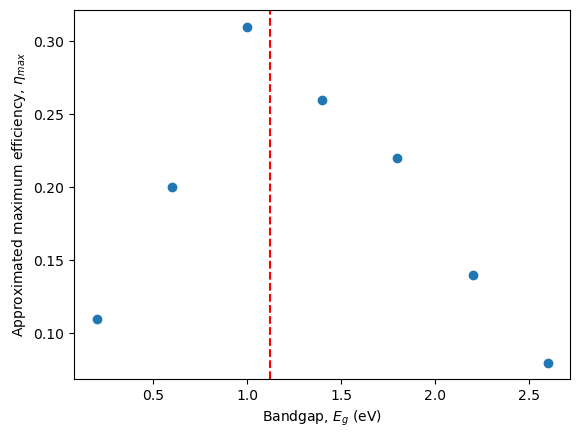

In [17]:
print(df)
plt.plot(df['eff_max'],'o')
plt.ylabel(r'Approximated maximum efficiency, $\eta_{max}$')
plt.xlabel('Bandgap, $E_g$ (eV)')
plt.axvline(1.12, c='red', ls='--')

***Discusion***

Silicon is used in solar cells because its bandgap allows a very efficient photovoltaic conversion of the sunlight as the overall transmission and thermalization losses are minimized, or, in other words, the trade-off between high current and voltage is maximized.